In [1]:
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt

In [2]:
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 predictions (Dense)         (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [4]:
model.compile(
    optimizer=keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [5]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/10
782/782 [==============================] - 4s 3ms/step - loss: 0.3585 - sparse_categorical_accuracy: 0.8986 - val_loss: 0.1878 - val_sparse_categorical_accuracy: 0.9449
Epoch 2/10
782/782 [==============================] - 2s 2ms/step - loss: 0.1613 - sparse_categorical_accuracy: 0.9513 - val_loss: 0.1450 - val_sparse_categorical_accuracy: 0.9586
Epoch 3/10
782/782 [==============================] - 2s 2ms/step - loss: 0.1198 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.1206 - val_sparse_categorical_accuracy: 0.9636
Epoch 4/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0943 - sparse_categorical_accuracy: 0.9711 - val_loss: 0.1071 - val_sparse_categorical_accuracy: 0.9676
Epoch 5/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0800 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.1024 - val_sparse_categorical_accuracy: 0.9700
Epoch 6/10
782/782 [==============================] - 2s 2ms/step - loss:

In [6]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
79/79 [==============================] - 0s 2ms/step - loss: 0.0985 - sparse_categorical_accuracy: 0.9735
test loss, test acc: [0.09848357737064362, 0.9735000133514404]
Generate predictions for 3 samples
1/1 [==============================] - 0s 60ms/step
predictions shape: (3, 10)


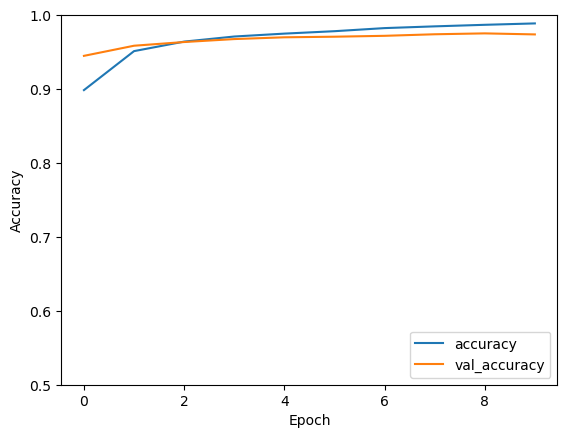

In [8]:
plt.plot(history.history['sparse_categorical_accuracy'], label='accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')